## Project Title: Unraveling Academic Dynamics

## Objective: 
To delve into the collaborative dynamics within the academic community using a dataset, and derive insights on influential individuals, collaboration patterns, and research topics.

## Dataset Overview:
The dataset comprises 8,140 records from journals, with prominent journals being SCIENTOMETRICS and JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATION SCIENCE AND TECHNOLOGY.

## Methodology and Results:

### Network Analysis: 
A co-authorship network was formed with the following parameters:

10,104 nodes (authors)
15,507 edges (collaborations)
The network showcased a density of 0.000303818, indicating a sparse network, and a transitivity of 0.555409, revealing a moderately clustered network.

### Centrality Analysis: 
The network's central figures were identified, with top authors including Bornmann, Lutz; Leydesdorff, Loet; and Thelwall, Mike.

### Community Detection: 
The modularity score, a measure of community structure, was 0.8405, signifying distinct and well-defined communities within the network.

### Solo vs. Co-authorship Analysis: 
Among the top 15 authors, the solo authorship rates varied, with the leading author having 11% solo publications and 89% co-authored publications.

## Topic Modeling: 

The abstracts of publications were analyzed to reveal key research topics:

Scientist productivity and behavior
Journal citation and publication analysis
Collaboration patterns and patent analysis
Research performance indicators and university rankings
Information retrieval and user behavior in libraries


## Conclusion:

The analysis unraveled the intricate dynamics of the academic world, revealing influential figures, distinct research communities, and diverse research themes. Institutions can leverage these insights for fostering collaborations, funding decisions, and steering research directions.







In the rapidly evolving landscape of academic research, bibliometric data serves as a treasure trove of insights. By analyzing the relationships between various metadata components like authors, titles, and citations, we can unveil patterns, trends, and dominant themes that shape the contours of scientific thought.

Leveraging the expansive bibliometric dataset from Web of Science, this notebook harnesses the power of the Metaknowledge package to delve deep into the intricacies of co-authorship networks and to discern the dominant academic topics through LDA topic modelling. Our analysis is guided by three primary questions:

Who among the top authors frequently collaborate, making them dominant co-authors?
How does the co-authorship network manifest, and what can we deduce from its structure?
Which themes or topics resonate most in the academic papers under our lens?
As we navigate through the sections of this notebook, we'll employ a systematic approach, starting with data preprocessing, followed by network construction and visualization, and culminating in topic modelling. Along the way, visualizations will enrich our understanding and help crystallize the insights drawn from the data.

Whether you're a bibliometrics enthusiast, a data scientist, or just someone curious about the dynamics of academic research, this notebook aims to provide a comprehensive exploration, replete with insights and visual narratives. So, let's embark on this analytical journey!





In [34]:
!pip install pyLDAvis


In [66]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

from ipywidgets import interact

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import ldamodel
from gensim.models import CoherenceModel 
import re
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt


from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [36]:
#!pip install metaknowledge 

In [37]:
#!pip3 install metaknowledge


In [38]:
#!pip3 install python-louvain


In [39]:
import networkx as nx
import metaknowledge as mk
import community


In [68]:

# Importing the information science and bibliometrics dataset
coll_rec = mk.RecordCollection("C:/Users/User/Documents/Project Drills/Bibliometric Analysis/raw_data/imetrics")



In [69]:
#displaying number of records
len(coll_rec)

8140

In [70]:
coll_rec

<metaknowledge.RecordCollection object files-from-C:\Users\User\Documents\Project Drills\Bibliometric Analysis\raw_data\imetrics>

The data we have is stored in a RecordCollection object. To visualize its contents, it's essential to convert it into a dataframe. 
This conversion can be accomplished through two different methods:
1. Utilizing the Pandas library, or
2. Employing the makeDict() function provided by the Metaknowledge package.


In [71]:

# Saving the dataset as a csv file
coll_rec.writeCSV("biblio_records.csv")
# Reading in the data as a Pandas dataframe
df = pd.read_csv("biblio_records.csv")
df.head(10)

,id,TI,AF,CR,ID,DI,PT,AU,SO,LA,...,FU,FX,EI,SI,PM,CA,num-Authors,num-Male,num-Female,num-Unknown
0,WOS:000305686800006,Assessing improvement in management research i...,"Kao, Chiang|Liu, Shiang-Tai|Pao, Hwei-Lan","Abramo G, 2011, SCIENTOMETRICS, V87, P399, DOI...",MALMQUIST PRODUCTIVITY INDEX|RANKING EFFICIENT...,10.1007/s11192-012-0721-x,J,"Kao, C|Liu, ST|Pao, HL",SCIENTOMETRICS,English,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,3
1,WOS:A1991GE82300005,THE SCIENTIFIC DYNAMICS OF A CITY - A STUDY OF...,"DOU, H|QUONIAM, L|HASSANALY, P","DICKMAN JT, 1979, CHEM ABSTRACTS INTRO|DOU H, ...",NaN,10.1007/BF02019276,J,"DOU, H|QUONIAM, L|HASSANALY, P",SCIENTOMETRICS,English,...,NaN,NaN,NaN,NaN,NaN,NaN,3,0,0,3
2,WOS:A1990EK50400017,INITIATIVES FOR THE PROMOTION OF SCIENCE OF SC...,"SPIEGEL, HR","BURRICHTER C, 1987, WISSENSCHAFTSFORSCHU|DANIE...",NaN,10.1007/BF02020711,J,"SPIEGEL, HR",SCIENTOMETRICS,English,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1
3,WOS:000221337500010,On the shoulders of Robert Merton: Towards a n...,"Small, H","MERTON RK, 1961, P AM PHILOS SOC, V105, P470|M...",SCIENTIFIC DISCOVERY|SCIENCE|SOCIOLOGY|CHAPTER,10.1023/B:SCIE.0000027310.68393.bc,J,"Small, H",SCIENTOMETRICS,English,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1
4,WOS:000246285200008,The role of the Internet in informal scholarly...,"Barjak, Franz","Abels EG, 1996, J AM SOC INFORM SCI, V47, P146...",COMPUTER-MEDIATED COMMUNICATION|SCIENTIFIC COL...,10.1002/asi.20454,J,"Barjak, F",JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,English,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0
5,WOS:000302478200007,Delineating the scientific footprint in techno...,"Callaert, Julie|Grouwels, Joris|Van Looy, Bart","Nelson AJ, 2009, RES POLICY, V38, P994, DOI 10...",SCIENCE|PATENTS|CITATIONS|LINKAGES,10.1007/s11192-011-0573-9,J,"Callaert, J|Grouwels, J|Van Looy, B",SCIENTOMETRICS,English,...,NaN,NaN,NaN,NaN,NaN,NaN,3,2,1,0
6,WOS:000090059500001,Chemistry research in Eastern Central Europe (...,"Braun, T|Glanzel, W","Cole S, 1999, MINERVA, V37, P1, DOI 10.1023/A:...",27 SCIENCE AREAS|NEWEST VERSION|LIFE SCIENCES|...,NaN,J,"Braun, T|Glanzel, W",SCIENTOMETRICS,English,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,2
7,WOS:000267368100009,International differences of productivity in s...,"Gantman, Ernesto R.","*ACAD MAN, 2007, ANN M PROGR|Alvarez J. L., 19...",TECHNOLOGY|SCIENCE|WORLD,10.1007/s11192-007-2054-8,J,"Gantman, ER",SCIENTOMETRICS,English,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0,0
8,WOS:000376273600018,Science system path-dependencies and their inf...,"Karaulova, Maria|Gok, Abdullah|Shackleton, Oli...","Alferov ZI, 1996, NATO ASI S 4 SCI TEC, V3, P5...",ACADEMY-OF-SCIENCES|BIBLIOMETRIC ANALYSIS|RESE...,10.1007/s11192-016-1916-3,J,"Karaulova, M|Gok, A|Shackleton, O|Shapira, P",SCIENTOMETRICS,English,...,Economic and Social Research Council [ES/J0127...,This work was supported by the Economic and So...,1588-2861,NaN,NaN,NaN,4,3,1,0
9,WOS:000260903700001,Generalizing the h- and g- indices,"van Eck, Nees Jan|Waltman, Ludo","Van Raan AFJ, 2006, SCIENTOMETRICS, V67, P491,...",HIRSCH-INDEX|BIBLIOMETRIC INDICATORS|SCIENTIST...,10.1016/j.joi.2008.09.004,J,"van Eck, NJ|Waltman, L",JOURNAL OF INFORMETRICS,English,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,2


In [72]:
# Saving the data as a dataframe using mk's makeDict()
df2 = pd.DataFrame(coll_rec.makeDict())
df2.head(10)

,PT,AU,AF,TI,SO,LA,DT,DE,ID,AB,...,FU,FX,EI,SI,PM,CA,num-Authors,num-Male,num-Female,num-Unknown
0,J,"[Kao, C, Liu, ST, Pao, HL]","[Kao, Chiang, Liu, Shiang-Tai, Pao, Hwei-Lan]",Assessing improvement in management research i...,SCIENTOMETRICS,English,Article,"[data envelopment analysis, malmquist producti...","[MALMQUIST PRODUCTIVITY INDEX, RANKING EFFICIE...",Research performance is difficult to evaluate ...,...,None,None,None,None,None,None,3,0,0,3
1,J,"[DOU, H, QUONIAM, L, HASSANALY, P]","[DOU, H, QUONIAM, L, HASSANALY, P]",THE SCIENTIFIC DYNAMICS OF A CITY - A STUDY OF...,SCIENTOMETRICS,English,Article,None,None,In a study of scientific publications originat...,...,None,None,None,None,None,None,3,0,0,3
2,J,"[SPIEGEL, HR]","[SPIEGEL, HR]",INITIATIVES FOR THE PROMOTION OF SCIENCE OF SC...,SCIENTOMETRICS,English,Article,None,None,None,...,None,None,None,None,None,None,1,0,0,1
3,J,"[Small, H]","[Small, H]",On the shoulders of Robert Merton: Towards a n...,SCIENTOMETRICS,English,Article,None,"[SCIENTIFIC DISCOVERY, SCIENCE, SOCIOLOGY, CHA...",In a series of seminal studies Robert K. Merto...,...,None,None,None,None,None,None,1,0,0,1
4,J,"[Barjak, F]","[Barjak, Franz]",The role of the Internet in informal scholarly...,JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATIO...,English,Article,None,"[COMPUTER-MEDIATED COMMUNICATION, SCIENTIFIC C...",The present analysis looks at how scientists u...,...,None,None,None,None,None,None,1,1,0,0
5,J,"[Callaert, J, Grouwels, J, Van Looy, B]","[Callaert, Julie, Grouwels, Joris, Van Looy, B...",Delineating the scientific footprint in techno...,SCIENTOMETRICS,English,Article; Proceedings Paper,"[science-technology interaction, non-patent re...","[SCIENCE, PATENTS, CITATIONS, LINKAGES]",Indicators based on non-patent references (NPR...,...,None,None,None,None,None,None,3,2,1,0
6,J,"[Braun, T, Glanzel, W]","[Braun, T, Glanzel, W]",Chemistry research in Eastern Central Europe (...,SCIENTOMETRICS,English,Article; Proceedings Paper,None,"[27 SCIENCE AREAS, NEWEST VERSION, LIFE SCIENC...",None,...,None,None,None,None,None,None,2,0,0,2
7,J,"[Gantman, ER]","[Gantman, Ernesto R.]",International differences of productivity in s...,SCIENTOMETRICS,English,Article,None,"[TECHNOLOGY, SCIENCE, WORLD]","Using a dataset of refereed conference papers,...",...,None,None,None,None,None,None,1,1,0,0
8,J,"[Karaulova, M, Gok, A, Shackleton, O, Shapira, P]","[Karaulova, Maria, Gok, Abdullah, Shackleton, ...",Science system path-dependencies and their inf...,SCIENTOMETRICS,English,Article; Proceedings Paper,"[russia, nanotechnology, path dependence]","[ACADEMY-OF-SCIENCES, BIBLIOMETRIC ANALYSIS, R...","In this paper, we study the influence of path ...",...,[Economic and Social Research Council [ES/J012...,This work was supported by the Economic and So...,1588-2861,None,None,None,4,3,1,0
9,J,"[van Eck, NJ, Waltman, L]","[van Eck, Nees Jan, Waltman, Ludo]",Generalizing the h- and g- indices,JOURNAL OF INFORMETRICS,English,Article,"[h-index, hirsch index, h(alpha)-index, g-inde...","[HIRSCH-INDEX, BIBLIOMETRIC INDICATORS, SCIENT...",We introduce two new measures of the performan...,...,None,None,None,None,None,None,2,0,0,2


In [45]:
df2.columns

Index(['PT', 'AU', 'AF', 'TI', 'SO', 'LA', 'DT', 'DE', 'ID', 'AB', 'C1', 'RP',
       'EM', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2', 'PU', 'PI', 'PA', 'SN', 'J9',
       'JI', 'PD', 'PY', 'VL', 'IS', 'BP', 'EP', 'DI', 'PG', 'WC', 'SC', 'GA',
       'UT', 'RI', 'OI', 'CT', 'CY', 'CL', 'SP', 'HO', 'FU', 'FX', 'EI', 'SI',
       'PM', 'CA', 'num-Authors', 'num-Male', 'num-Female', 'num-Unknown'],
      dtype='object')

The makeDict() function refines the original RecordCollection object by eliminating the 'id' column and rearranging specific columns. Nonetheless, the essential data remains intact. The two-letter variable names within the dataset are tags designated by Web of Science: https://images.webofknowledge.com/images/help/WOK/hs_alldb_fieldtags.html. 

For an in-depth understanding of these tags, you can refer to Web of Science's Field Tags Guide 



In [46]:
# Printing basic statistics about the data
print(coll_rec.glimpse())

RecordCollection glimpse made at: 2023-10-23 06:04:43
8140 Records from files-from-C:\Users\User\Docum

Top Authors
1 Bornmann, Lutz
2 Leydesdorff, Loet
3 Thelwall, Mike
4 Rousseau, Ronald
5 SCHUBERT, A
6 Abramo, Giovanni
6 D'Angelo, Ciriaco Andrea
7 Glanzel, Wolfgang
8 Glanzel, W
9 Huang, Mu-Hsuan
10 BRAUN, T
10 Lariviere, Vincent

Top Journals
1 SCIENTOMETRICS
2 JOURNAL OF THE AMERICAN SOCIETY FOR INFORMATION SCIENCE AND TECHNOLOGY
3 JOURNAL OF INFORMETRICS
4 JOURNAL OF THE ASSOCIATION FOR INFORMATION SCIENCE AND TECHNOLOGY

Top Cited
1 Hirsch JE, 2005, P NATL ACAD SCI USA, V102, P16569, DOI 10.1073/pnas.0507655102
2 Egghe L, 2006, SCIENTOMETRICS, V69, P131, DOI 10.1007/s11192-006-0144-7
3 SMALL H, 1973, J AM SOC INFORM SCI, V24, P265, DOI 10.1002/asi.4630240406
4 GARFIELD E, 1972, SCIENCE, V178, P471, DOI 10.1126/science.178.4060.471
5 MERTON RK, 1968, SCIENCE, V159, P56, DOI 10.1126/science.159.3810.56
5 Glanzel W, 2001, SCIENTOMETRICS, V51, P69, DOI 10.1023/A:1010512628145
6 PRICE

# Network Analysis
Network analysis is a powerful tool that unveils the structure and dynamics of complex relationships among the nodes within a network. 
In this particular context, we are interested in investigating the co-authorship network to explore the collaborative landscape within this dataset.
Through network analysis, we can identify key nodes (in this case, authors), examine the distances and co-occurrences among them, and uncover the underlying patterns of collaborative research.







# Conducting Network Analysis on Co-authorship:
## 1. Extraction of Co-authorship Data:
Initially, we need to extract the co-authorship information from our dataset. This involves identifying all unique author pairs that have co-authored papers together.

In [47]:
# Generation of the co-author network 
coauth_network = coll_rec.networkCoAuthor()
coauth_network

In [48]:
# Printing the network stats
print(mk.graphStats(coauth_network))

Nodes: 10104
Edges: 15507
Isolates: 1111
Self loops: 0
Density: 0.000303818
Transitivity: 0.555409


In [49]:
import networkx as nx
import metaknowledge as mk

# Assuming coauth_network is your network
mk.dropEdges(coauth_network, minWeight=2, dropSelfLoops=True)

# Get the connected components
connected_components = nx.connected_components(coauth_network)

# Get the largest connected component
largest_component_nodes = max(connected_components, key=len)

# Create a subgraph from the largest connected component
giant_coauthor = coauth_network.subgraph(largest_component_nodes)

# Now you can proceed with your analysis
print(mk.graphStats(giant_coauthor))


Nodes: 265
Edges: 443
Isolates: 0
Self loops: 0
Density: 0.0126644
Transitivity: 0.285714


# 2. Network Metrics Computation:
With the network constructed, we can compute various network metrics such as degree centrality, betweenness centrality, and community structure to understand the network's topology and identify influential nodes.

In [50]:
# Computing centrality scores
deg = nx.degree_centrality(giant_coauthor)
clo = nx.closeness_centrality(giant_coauthor)
bet = nx.betweenness_centrality(giant_coauthor)
eig = nx.eigenvector_centrality(giant_coauthor)

# Saving the scores as a dataframe
cent_df = pd.DataFrame.from_dict([deg, clo, bet, eig])
cent_df = pd.DataFrame.transpose(cent_df)
cent_df.columns = ["degree", "closeness", "betweenness", "eigenvector"]

# Printing the top 10 co-authors by degree centrality score
cent_df.sort_values("degree", ascending = False)[:15]

,degree,closeness,betweenness,eigenvector
"Thelwall, Mike",0.098485,0.241758,0.217349,0.205402
"Rousseau, Ronald",0.079545,0.233216,0.191199,0.004988
"Leydesdorff, Loet",0.079545,0.314660,0.755110,0.052198
"Ding, Ying",0.071970,0.238914,0.168347,0.439281
"Lariviere, Vincent",0.068182,0.239782,0.108039,0.233844
"Glanzel, Wolfgang",0.056818,0.232190,0.158634,0.005966
"Sugimoto, Cassidy R.",0.053030,0.245125,0.077937,0.286049
"Bornmann, Lutz",0.045455,0.251908,0.041503,0.017393
"de Moya-Anegon, Felix",0.041667,0.249292,0.103560,0.011894
"Wang, Xianwen",0.041667,0.149153,0.074000,0.000051


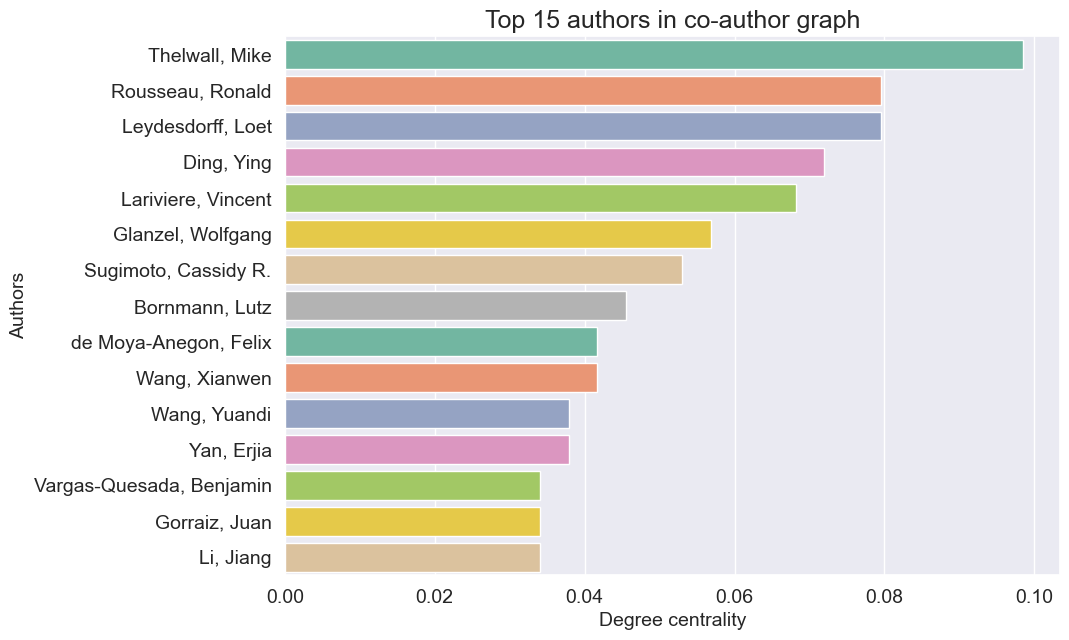

In [51]:
# Visualizing the top 15 co-authors by degree centrality score
sns.set(font_scale=.75)
cent_df_d15 = cent_df.sort_values('degree', ascending = False)[:15]
cent_df_d15.index.name = "author"
cent_df_d15.reset_index(inplace=True)
print()
plt.figure(figsize=(10,7))
ax = sns.barplot(y = "author", x = "degree", data = cent_df_d15, palette = "Set2");
ax.set_alpha(0.8)
ax.set_title("Top 15 authors in co-author graph", fontsize = 18)
ax.set_ylabel("Authors", fontsize=14);
ax.set_xlabel("Degree centrality", fontsize=14);
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

In [52]:
solo = []
co = []
for i in cent_df_d15["author"]:
    # Calculate solo authorship rate
    so = np.round((len(df[(df['AF'].str.contains(i)) & (df['num-Authors'] == 1)])) / (len(df[df['AF'].str.contains(i)])), decimals = 3)
    solo.append(so)
    # Calculate co-authorship rate
    co.append(1-so)
print(solo, co)



[0.112, 0.131, 0.165, 0.132, 0.024, 0.133, 0.033, 0.167, 0.0, 0.0, 0.0, 0.148, 0.0, 0.0, 0.077] [0.888, 0.869, 0.835, 0.868, 0.976, 0.867, 0.967, 0.833, 1.0, 1.0, 1.0, 0.852, 1.0, 1.0, 0.923]


In [53]:
# Create top 15 authors dataframe
authors = pd.DataFrame(zip(solo, co), columns = ["solo", "coauthor"])
authors["author"] = cent_df_d15["author"]
# Rearrange columns
authors = authors[["author", "solo", "coauthor"]]
authors

,author,solo,coauthor
0,"Thelwall, Mike",0.112,0.888
1,"Rousseau, Ronald",0.131,0.869
2,"Leydesdorff, Loet",0.165,0.835
3,"Ding, Ying",0.132,0.868
4,"Lariviere, Vincent",0.024,0.976
5,"Glanzel, Wolfgang",0.133,0.867
6,"Sugimoto, Cassidy R.",0.033,0.967
7,"Bornmann, Lutz",0.167,0.833
8,"de Moya-Anegon, Felix",0.000,1.000
9,"Wang, Xianwen",0.000,1.000


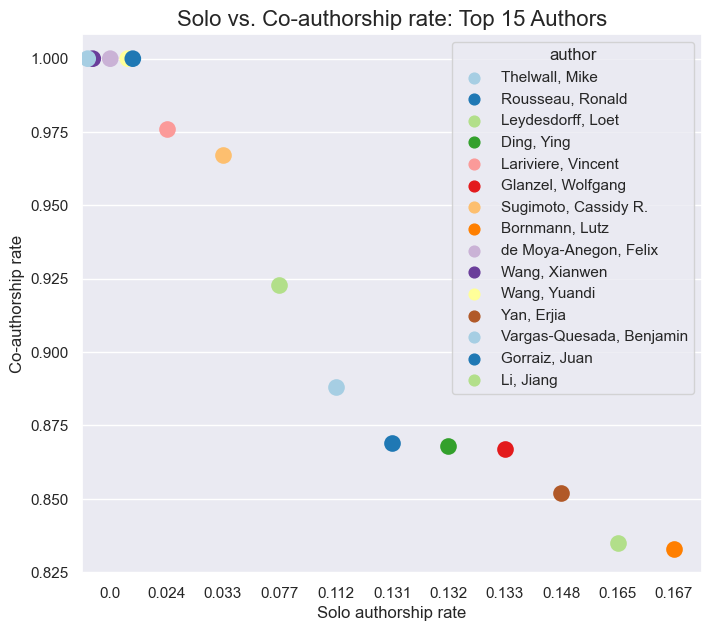

In [54]:
sns.set(rc={'figure.figsize':(8,7)})
fig = sns.swarmplot(x = "solo", y = "coauthor", hue = "author", data = authors, s = 12, palette = "Paired")
plt.title("Solo vs. Co-authorship rate: Top 15 Authors", fontsize = 16)
plt.xlabel("Solo authorship rate")
plt.ylabel("Co-authorship rate")
plt.show()

## Community Detection
The Louvain method revealed communities within the network, with a high modularity score of `0.8405`, indicating well-defined communities.

In [55]:
# Community detection
partition = community.best_partition(giant_coauthor) 
modularity = community.modularity(partition, giant_coauthor)
print("Modularity:", modularity)

Modularity: 0.8405541571153435



# 3. Network Construction
Post data extraction, we proceed to construct the co-authorship network. Each node represents an author, while edges signify the co-authorship relations. The edge weight might represent the number of papers co-authored.

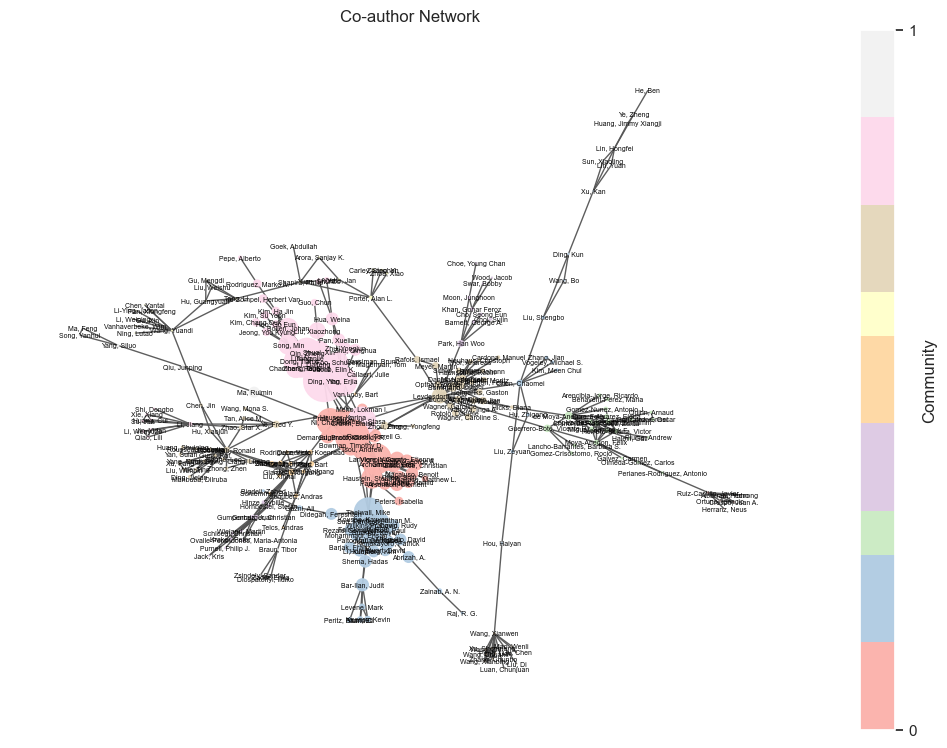

In [56]:
import matplotlib.pyplot as plt
import networkx as nx

# Assuming you've already computed eigenvector centrality and stored it in 'eig'
# and assuming giant_coauthor is your network

# Visualizing the co-author network
plt.figure(figsize=(10, 7))

# Node size based on eigenvector centrality
size = [2000 * eig[node] for node in giant_coauthor]

# Node color based on community membership or some other attribute
# Let's assume 'partition' is a dictionary with node-community mappings
colors = [partition[node] for node in giant_coauthor]

# Create a colormap to map community labels to colors
# Using a light colormap to ensure dark text is readable
cmap = plt.cm.get_cmap('Pastel1', max(partition.values()) + 1)

# Draw the network
nx.draw_spring(
    giant_coauthor, 
    node_size=size, 
    with_labels=True, 
    font_size=5, 
    font_color='black',  # Dark text for better readability
    node_color=colors,  # Node color now based on community membership
    cmap=cmap,  # Apply the light colormap
    edge_color="#555555",  # Changed edge color to a dark grey for better contrast
    alpha=0.95
)

# Display a colorbar to show community color mappings
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
plt.colorbar(sm, label='Community', ticks=range(max(partition.values()) + 1))

# Display the visualization
plt.title('Co-author Network')
plt.show()




# 4. Visualization:
Visual representation of the network will enable a more intuitive understanding of the co-authorship dynamics. This can be achieved using libraries such as NetworkX or Gephi.


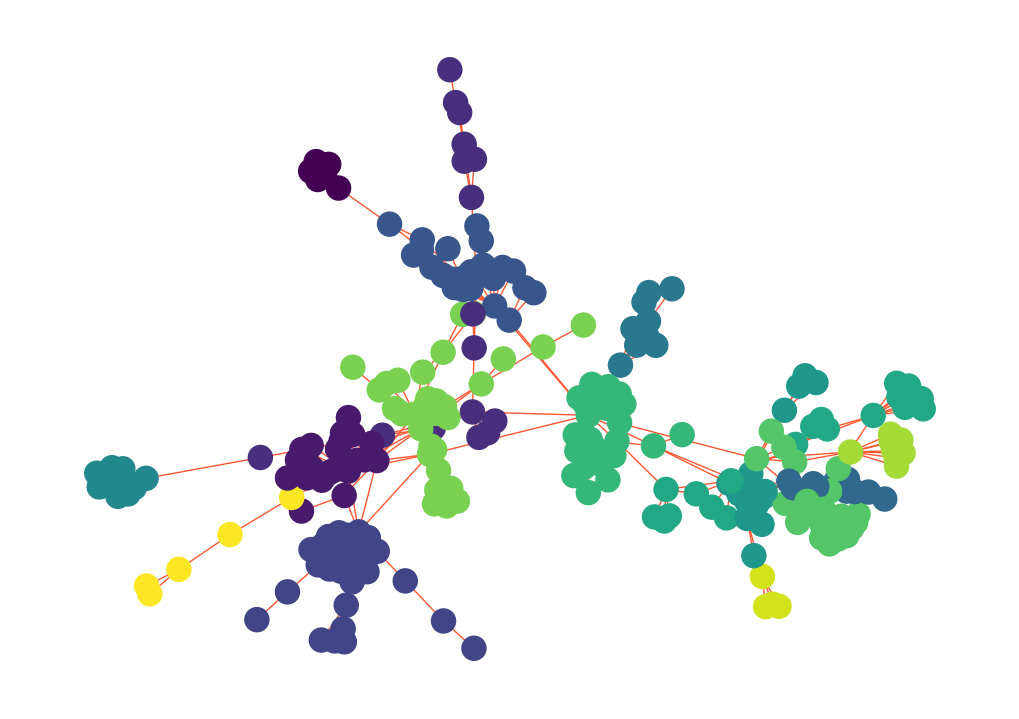

In [57]:
# Visualizing the communities
# Generates a different graph each time
plt.figure(figsize=(10, 7))
colors = [partition[n] for n in giant_coauthor.nodes()]
my_colors = plt.cm.viridis  # Corrected colormap to viridis
nx.draw(giant_coauthor, node_color=colors, cmap=my_colors, edge_color="#FF5733")  # Changed edge color to #FF5733



In [58]:
# Transform the record collection into a format for use with natural language processing applications
data = coll_rec.forNLP("topic_model_data.csv", lower=True, removeNumbers=True, removeNonWords=True, removeWhitespace=True)

# Convert the raw text into a list.
docs = data['abstract']
docs

['research performance is difficult to evaluate because most of the criteria are incommensurable and assessing its improvement over time is even more difficult this paper assesses the performance improvement in management research in taiwan between  and  using the malmquist productivity index mpi the criteria for measuring research performance are journal publications where the journals are classified as si ti other international and other localtypes while the number of papers has increased for three types and decreased in one the mpi indicates that the aggregate performance has improved significantly the areas of management covered in this study are management information systems production and operations management and marketing for all these areas the performance has improved although the improvement in marketing is insignificant the assessment sheds some light on the area and category of journals that contribute to the improvement of research performance and which are useful for se

In [59]:
# Defining a function to clean the text
def clean(docs):
    # Insert function for preprocessing the text
    def sent_to_words(sentences):
        for sentence in sentences:
            yield (simple_preprocess(str(sentence), deacc = True))
    # Tokenize the text
    tokens = sent_to_words(docs)
    # Create stopwords set
    stop = set(stopwords.words("english"))
    # Create lemmatizer
    lemmatiser = WordNetLemmatizer()
    # Remove stopwords from text
    tokens_stopped = [[word for word in post if word not in stop] for post in tokens]
    # Lemmatize text
    tokens_cleaned = [[lemmatiser.lemmatize(word) for word in post] for post in tokens_stopped]
    # Return cleaned text
    return tokens_cleaned

# Cleaning up the raw documents
cleaned_docs = clean(docs)
cleaned_docs

[['research',
  'performance',
  'difficult',
  'evaluate',
  'criterion',
  'incommensurable',
  'assessing',
  'improvement',
  'time',
  'even',
  'difficult',
  'paper',
  'ass',
  'performance',
  'improvement',
  'management',
  'research',
  'taiwan',
  'using',
  'malmquist',
  'productivity',
  'index',
  'mpi',
  'criterion',
  'measuring',
  'research',
  'performance',
  'journal',
  'publication',
  'journal',
  'classified',
  'si',
  'ti',
  'international',
  'localtypes',
  'number',
  'paper',
  'increased',
  'three',
  'type',
  'decreased',
  'one',
  'mpi',
  'indicates',
  'aggregate',
  'performance',
  'improved',
  'significantly',
  'area',
  'management',
  'covered',
  'study',
  'management',
  'information',
  'system',
  'production',
  'operation',
  'management',
  'marketing',
  'area',
  'performance',
  'improved',
  'although',
  'improvement',
  'marketing',
  'insignificant',
  'assessment',
  'shed',
  'light',
  'area',
  'category',
  'journal

In [60]:
# Creating a dictionary
id2word = corpora.Dictionary(cleaned_docs)
print(id2word)

Dictionary(21943 unique tokens: ['aggregate', 'although', 'area', 'ass', 'assessing']...)


In [61]:
# Filtering infrequent and over frequent words
id2word.filter_extremes(no_below=15, no_above=0.5)
# Creating a document-term matrix
corpus = [id2word.doc2bow(doc) for doc in cleaned_docs]

In [62]:
# Building an LDA model with 10 topics
model = ldamodel.LdaModel(corpus = corpus,
                          num_topics = 10,
                          id2word = id2word,
                          passes = 10,
                          update_every = 1,
                          chunksize = 1000,
                          per_word_topics = True,
                          random_state = 1)
# Printing the topic-word distributions
pprint(model.print_topics())

[(0,
  '0.029*"scientist" + 0.022*"scientific" + 0.022*"science" + '
  '0.021*"productivity" + 0.019*"researcher" + 0.015*"group" + '
  '0.013*"difference" + 0.013*"paper" + 0.011*"department" + '
  '0.010*"individual"'),
 (1,
  '0.018*"factor" + 0.016*"study" + 0.015*"social" + 0.014*"quality" + '
  '0.012*"data" + 0.011*"use" + 0.011*"effect" + 0.010*"online" + '
  '0.009*"medium" + 0.008*"review"'),
 (2,
  '0.055*"journal" + 0.038*"citation" + 0.028*"paper" + 0.027*"publication" + '
  '0.026*"article" + 0.024*"science" + 0.020*"author" + 0.017*"number" + '
  '0.017*"published" + 0.015*"year"'),
 (3,
  '0.037*"patent" + 0.032*"collaboration" + 0.025*"country" + '
  '0.021*"technology" + 0.018*"network" + 0.014*"knowledge" + '
  '0.012*"international" + 0.011*"innovation" + 0.011*"china" + '
  '0.011*"scientific"'),
 (4,
  '0.016*"document" + 0.015*"search" + 0.015*"method" + 0.013*"result" + '
  '0.011*"web" + 0.011*"query" + 0.010*"retrieval" + 0.010*"term" + '
  '0.009*"approach" +

In [63]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, id2word, mds = "tsne")
vis


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      137.767578   -4.722117       1        1  14.610246
4       64.520126  113.705276       2        1  14.488064
7      -33.305775  -63.294987       3        1  12.731004
6     -165.207077   57.951263       4        1  12.201870
9     -144.793930  -64.632210       5        1  10.853428
3       69.042671 -109.290642       6        1   8.427927
5      -52.806984  139.015244       7        1   8.187261
1      -53.699284 -164.016724       8        1   7.521990
8       35.186390   11.852304       9        1   5.608243
0      -63.994843   33.628914      10        1   5.369967, topic_info=            Term         Freq        Total Category  logprob  loglift
24       journal  5171.000000  5171.000000  Default  30.0000  30.0000
39      research  7576.000000  7576.000000  Default  29.0000  29.0000
71      citation  5994.000000  5994.000000  Default  28.0000  28.0000
22   information  4673.000000  4673.000000  Default  27.0000  27.0000
194       patent  1693.000000  1693.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
198  significant   159.920015   881.774644  Topic10  -5.2182   1.2171
160       result   206.568139  3373.082035  Topic10  -4.9622   0.1314
37   publication   196.286701  3464.749053  Topic10  -5.0133   0.0535
31           one   174.308321  1767.048950  Topic10  -5.1320   0.6081
335    different   164.918102  2206.657261  Topic10  -5.1874   0.3306

[737 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2349      9  0.983787       aca
112       1  0.005912  academic
112       3  0.001689  academic
112       4  0.359786  academic
112       6  0.009290  academic
...     ...       ...       ...
379       6  0.017163      year
379      10  0.065792      year
2884      3  0.136812     young
2884      4  0.034203     young
2884     10  0.820869     young

[1653 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 8, 7, 10, 4, 6, 2, 9, 1])